In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from matplotlib.ticker import MultipleLocator

Skip unnecessary rows and assign meaningful column names

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Salvador/most-frequent-crimes-in-el-salvador-by-type-2024.csv',skiprows=3, names=["Crime Type", "Count"])

Drop rows with missing data

In [ ]:
df = df.dropna()

Convert 'Count' to numeric after removing commas

In [ ]:
df['Count'] = df['Count'].str.replace(',', '').astype(int)

Plot the data and customize the plot

<ipython-input-12-337dba691b45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Crime Type', y='Count', palette='viridis')


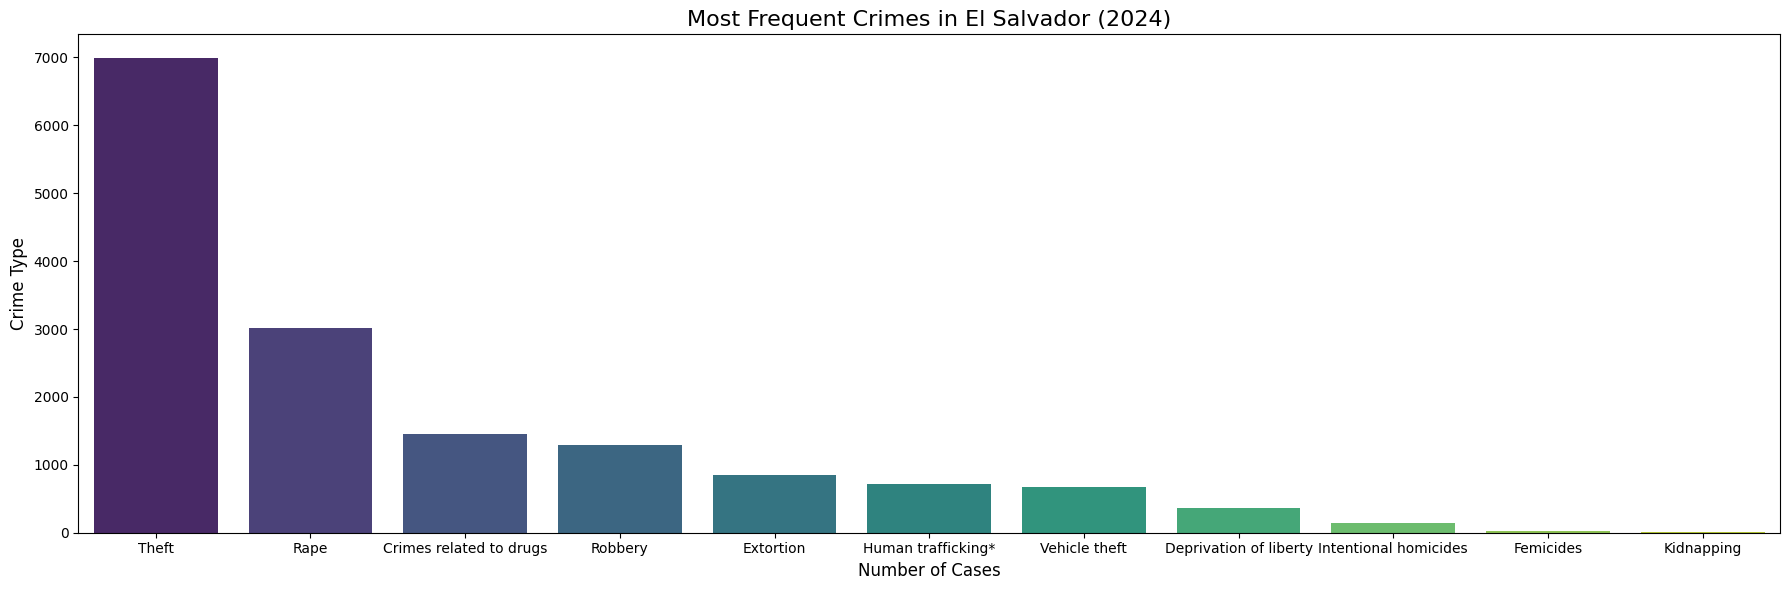

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x='Crime Type', y='Count', palette='viridis')
plt.title('Most Frequent Crimes in El Salvador (2024)', fontsize=16)
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.tight_layout()
plt.show()

Data for male intention homicides per 100 000 males in El Salvador

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Salvador/male_intentional_homicide.csv',skiprows=4)

Filter the DataFrame to include only the data for El Salvador

In [ ]:
el_salvador_data = df1[df1['Country Name'] == 'El Salvador']

Preparing the data for plotting , by reshape it for plotting. Using the melt function to transform the DataFrame from wide to long format

In [ ]:
el_salvador_melted = el_salvador_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],var_name='Year', value_name='Homicides')


Plot the data using Seaborn or Matplotlib

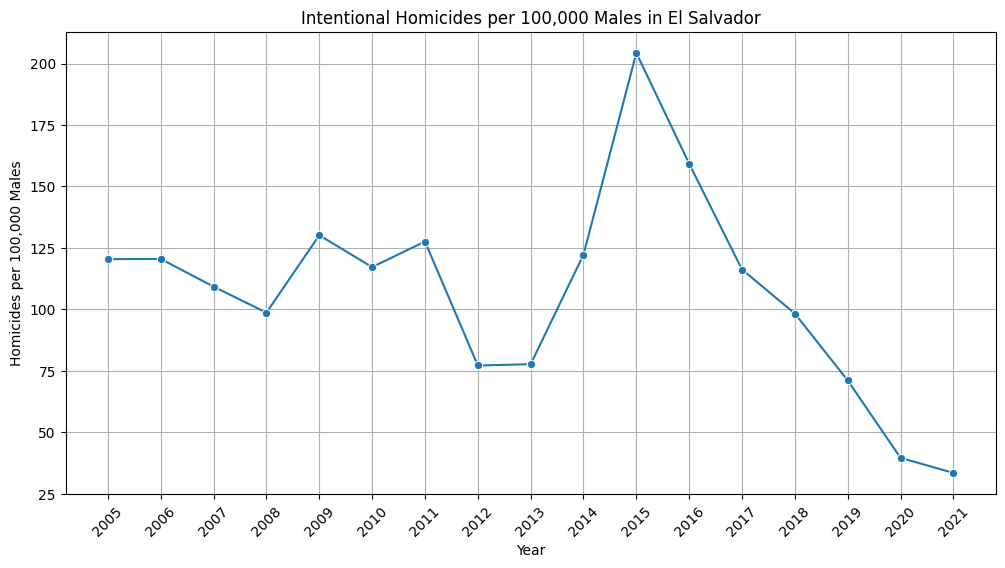

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=el_salvador_melted, x='Year', y='Homicides', marker='o')
plt.title('Intentional Homicides per 100,000 Males in El Salvador')
plt.xlabel('Year')
plt.ylabel('Homicides per 100,000 Males')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Intentional homicides per 100 000 females in El Salvador

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Salvador/female-homicide_per100k.csv',skiprows=4)

Filter the DataFrame to include only the data for El Salvador

In [ ]:
el_salvador_data_female = df2[df2['Country Name'] == 'El Salvador']

Preparing the data for plotting , by reshape it for plotting. Using the melt function to transform the DataFrame from wide to long format

In [ ]:
el_salvador_melted1 = el_salvador_data_female.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],var_name='Year', value_name='Homicides')


Plot the data using Seaborn or Matplotlib

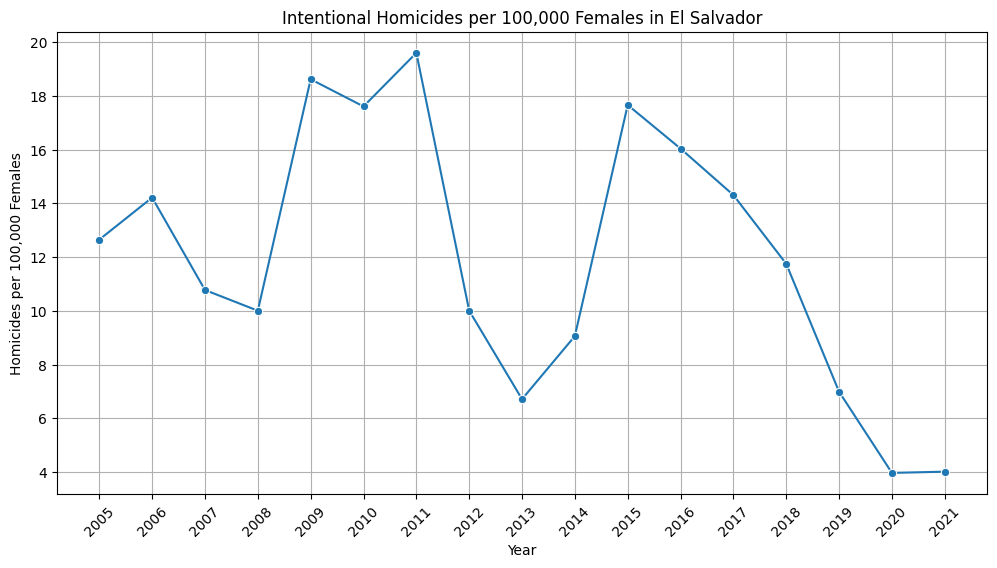

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=el_salvador_melted1, x='Year', y='Homicides', marker='o')
plt.title('Intentional Homicides per 100,000 Females in El Salvador')
plt.xlabel('Year')
plt.ylabel('Homicides per 100,000 Females')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Internally displaced persons, new displacement associated with conflict and violence

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Salvador/people_displaced.csv',skiprows=4)

In [ ]:
el_salvador_displaced = df3[df3['Country Name'] == 'El Salvador']

In [ ]:
el_salvador_melted2 = el_salvador_displaced.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],var_name='Year', value_name='Homicides')


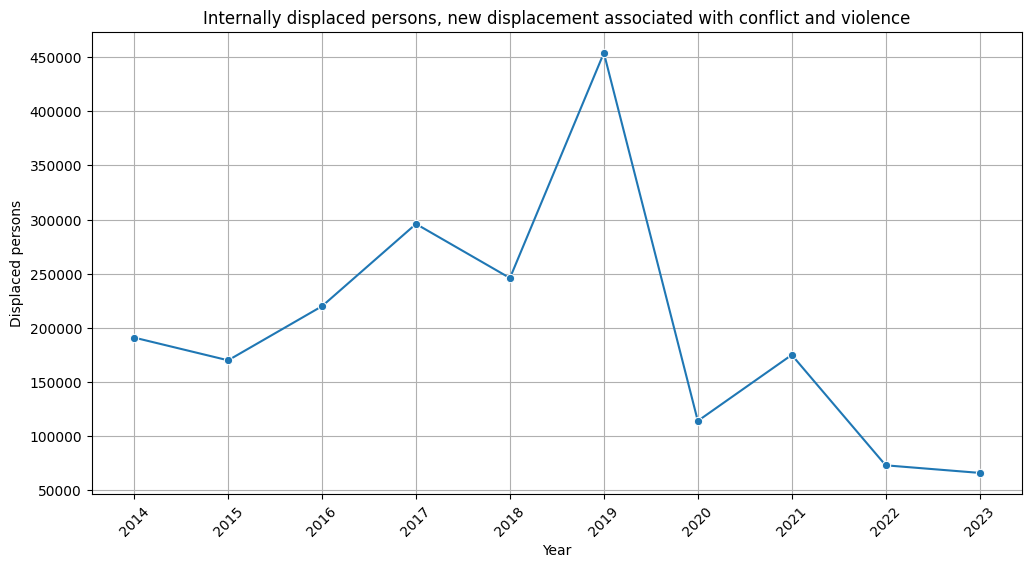

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=el_salvador_melted2, x='Year', y='Homicides', marker='o')
plt.title('Internally displaced persons, new displacement associated with conflict and violence')
plt.xlabel('Year')
plt.ylabel('Displaced persons')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-25-7adaad50d067>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4, x='Count', y='Countries', palette='hot')


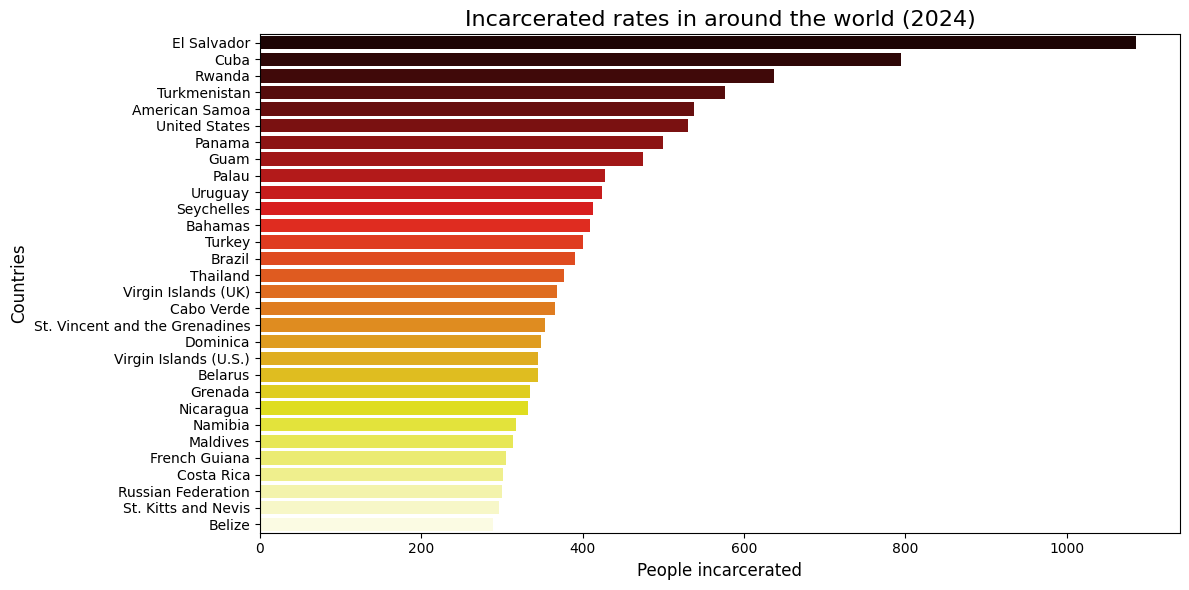

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Salvador/incarceration-rates-in-selected-countries-2024.csv', names=["Countries", "Count"])
df4 = df4.dropna()
df4['Count'] = df4['Count'].str.replace(',', '').astype(int)


plt.figure(figsize=(12, 6))
sns.barplot(data=df4, x='Count', y='Countries', palette='hot')
plt.title('Incarcerated rates around the world (2024)', fontsize=16)
plt.xlabel('People incarcerated', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/Salvador/unemployment-rate-in-el-salvador.csv')

Start from the 3rd row and select relevant columns and Rename columns

In [ ]:
cleaned_data = df5.iloc[2:, :2]
cleaned_data.columns = ['Year', 'Unemployment Rate']

Convert "Year" to numeric, coercing errors to NaN, and drop invalid rows

In [ ]:
cleaned_data['Year'] = pd.to_numeric(cleaned_data['Year'], errors='coerce')
cleaned_data = cleaned_data.dropna(subset=['Year'])
cleaned_data['Year'] = cleaned_data['Year'].astype(int)

<ipython-input-33-df6bba18b9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year'] = cleaned_data['Year'].astype(int)


Clean and convert "Unemployment Rate" to float  Drop rows with NaN values resulting from invalid conversions

In [ ]:
cleaned_data['Unemployment Rate'] = pd.to_numeric(cleaned_data['Unemployment Rate'], errors='coerce')
cleaned_data = cleaned_data.dropna().reset_index(drop=True)

Plot data, add titles and labels, adjust layout and show

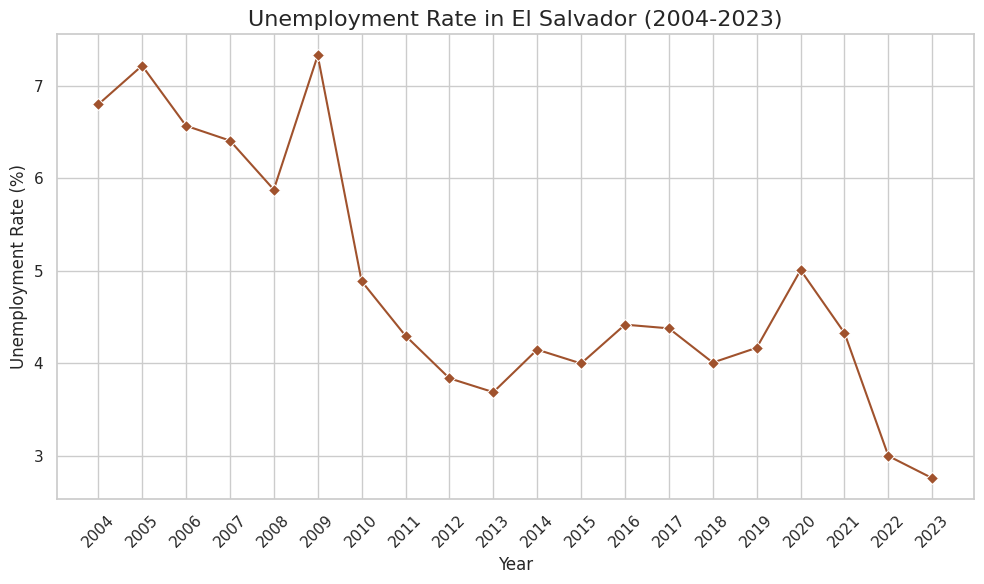

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='Year', y='Unemployment Rate', marker='D', color='sienna')
plt.title('Unemployment Rate in El Salvador (2004-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(ticks=cleaned_data['Year'], labels=cleaned_data['Year'], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df6 = pd.read_csv('/content/drive/MyDrive/Salvador/military1.csv')
df = pd.DataFrame(df6)

In [ ]:
print(df6.columns)

Index(['Date', ' GDP (Billions of US $)', ' Per Capita (US $)'], dtype='object')


In [ ]:
df6.head(), df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     63 non-null     object 
 1    GDP (Billions of US $)  63 non-null     float64
 2    Per Capita (US $)       58 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


(         Date   GDP (Billions of US $)   Per Capita (US $)
 0  12/31/1960                 0.004384                 NaN
 1  12/31/1961                 0.004442                 NaN
 2  12/31/1962                 0.006219                 NaN
 3  12/31/1963                 0.006104                 NaN
 4  12/31/1964                 0.005724                 NaN,
 None)

Strip whitespace from column names

In [ ]:
df.columns = df.columns.str.strip()

Convert 'Date' to datetime format and ensure GDP and Per Capita columns are numeric

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['GDP (Billions of US $)'] = pd.to_numeric(df['GDP (Billions of US $)'], errors='coerce')
df['Per Capita (US $)'] = pd.to_numeric(df['Per Capita (US $)'], errors='coerce')

Plot data and customize the plot

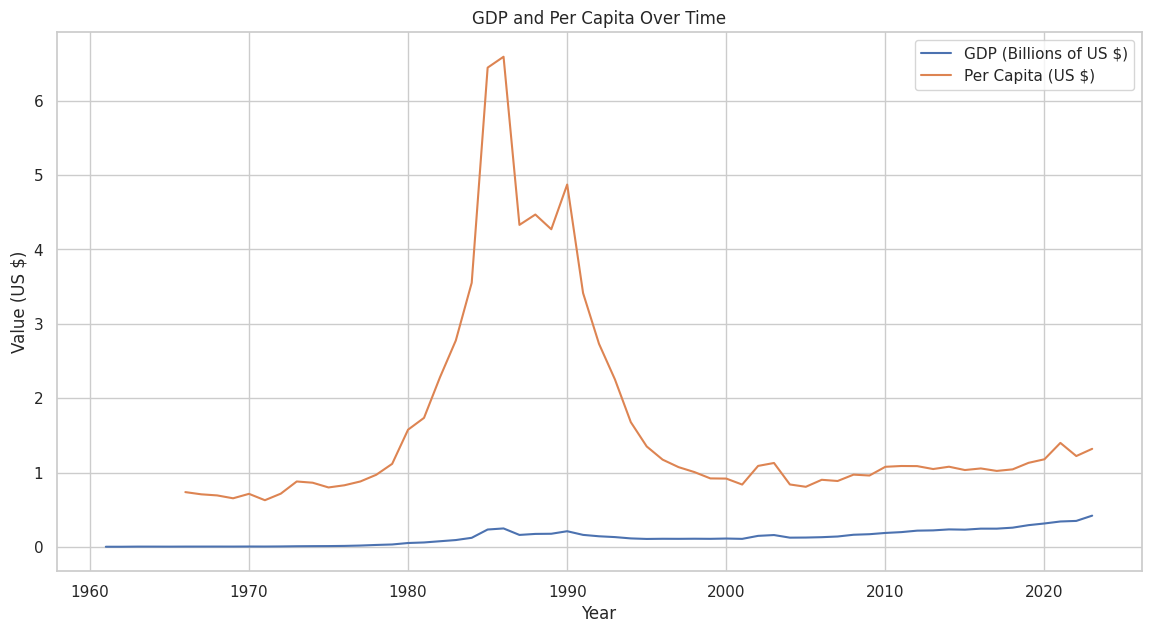

In [ ]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='GDP (Billions of US $)', label='GDP (Billions of US $)')
sns.lineplot(data=df, x='Date', y='Per Capita (US $)', label='Per Capita (US $)')

plt.title('GDP and Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Value (US $)')
plt.legend()
plt.grid(True)
plt.show()

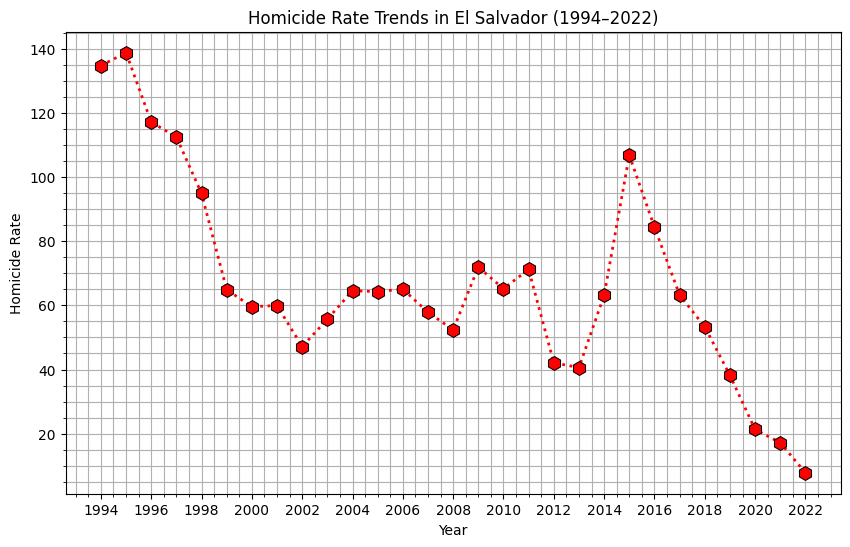

In [ ]:
df7 = pd.read_csv('/content/drive/MyDrive/Salvador/homicide-rate-unodc.csv')
df7.columns = ['Entity', 'Code', 'Year', 'Homicide Rate']
plt.figure(figsize=(10, 6))
sns.lineplot(data=df7, x='Year', y='Homicide Rate', marker='h', color='red', markersize=10, linestyle = ':', linewidth=2, markeredgecolor='black')

ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.minorticks_on()

plt.title('Homicide Rate Trends in El Salvador (1994–2022)')
plt.xlabel('Year')
plt.ylabel('Homicide Rate')

plt.grid(True, which='both')
plt.show()